# Decision Trees

## Importing Libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
root_path = Path(".").absolute()
data_path = root_path / "data"
data_path.mkdir(exist_ok=True)

%matplotlib inline

## About the dataset

<p>Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.</p>
<p>Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.</p>
<p>It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.</p>

## Load the dataset

In [3]:
file = data_path / "drug200.csv"
df = pd.read_csv(file)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Analysis and preprocessing

<p>You should apply some basic analytics steps to understand the data better. First, let's gather some basic information about the dataset.</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<p>This tells us that 4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling. For this, we can make use of <code>LabelEncoder</code> from the <code>Scikit-Learn</code> library.</p>

In [5]:
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["BP"] = label_encoder.fit_transform(df["BP"])
df["Cholesterol"] = label_encoder.fit_transform(df["Cholesterol"])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


<p>With this, you now have 5 parameters that can be used for modeling and 1 feature as the target variable. We can see from comparison of the data before label encoding and after it, to note the following mapping.</p>
<p>For parameter "Sex": $M \rightarrow 1$, $F \rightarrow 0$.</p>
<p>For parameter "BP": $High \rightarrow 0$, $Low \rightarrow 1$, $Normal \rightarrow 2$.</p>
<p>For parameter "Cholesterol": $High \rightarrow 0$, $Normal \rightarrow 1$.</p>
<p>You can also check if there are any missing values in the dataset.</p>

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<p>To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value. Execute the followig cell to achieve the same.</p>

In [7]:
custom_map = {"drugA": 0, "drugB": 1, "drugC": 2, "drugX": 3, "drugY": 4}
df["Drug_num"] = df["Drug"].map(custom_map)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


<p>You can now use the <code>corr()</code> function to find the correlation of the input variables with the target variable.</p>

### Practice

<p>Write the code to find the correlation of the input variables with the target variable and identify the features most significantly affecting the target.</p>

In [8]:
df.drop("Drug", axis=1).corr()["Drug_num"]

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

<p>This shows that the drug recommendation is mostly correlated with the <code>Na_to_K</code> and  <code>BP</code> features.</p>
<p>We can also understand the distribution of the dataset by plotting the count of the records with each drug recommendation.</p>

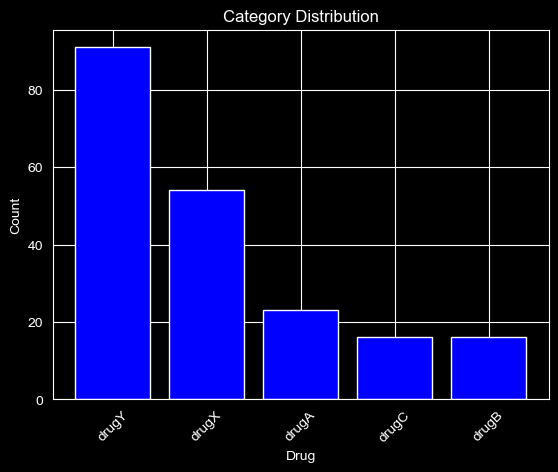

In [9]:
category_counts = df["Drug"].value_counts()

plt.bar(category_counts.index, category_counts.values, color="blue")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45)

<p>This shows us the distribution of the different classes, clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.</p>

## Modeling

<p>For modeling this dataset with a Decision tree classifier, we first split the dataset into training and testing subsets. For this, we separate the target variable from the input variables.</p>

In [10]:
y = df["Drug"]
X = df.drop(["Drug", "Drug_num"], axis=1)

<p>Now, use the <code>train_test_split()</code> function to separate the training data from the testing data. We can make use of 30% of the data for testing and the rest for training the Decision tree.</p>

In [11]:
split_data: list[pd.DataFrame | pd.Series] = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_set, X_test_set, y_train_set, y_test_set = split_data

<p>You can now define the Decision tree classifier as <code>drugTree</code> and train it with the training data.</p>

In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree.fit(X_train_set, y_train_set)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluation

<p>Now that you have trained the decision tree, we can use it to generate the predictions on the test set. And check the accuracy of our model by using the accuracy metric.</p>

In [13]:
tree_predictions: np.ndarray = drugTree.predict(X_test_set)
print(f"Decision Tree's Accuracy: {metrics.accuracy_score(y_test_set, tree_predictions)}")

Decision Tree's Accuracy: 1.0


<p>This means that the model was able to correctly identify the lables of 100%.</p>

### Visualize the tree

<p>To understand the classification criteria derived by the Decision tree, we may generate the tree plot.</p>

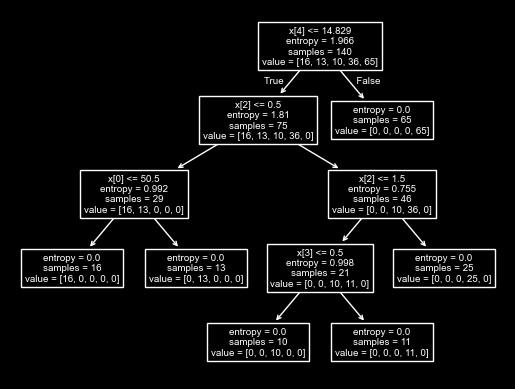

In [14]:
plot_tree(drugTree)

<p>From this tree, we can derive the criteria developed by the model to identify the class of each training sample. We can interpret them by tracing the criteria defined by tracing down from the root to the tree's leaf notes.</p>
<p>For instance, the decision criterion for Drug Y is $Na\_to\_K > 14.829$.</p>

## Practice

<p>If the max depth of the tree is reduced to 3, how would the performance of the model be affected?</p>

In [15]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
drugTree.fit(X_train_set, y_train_set)
tree_predictions = drugTree.predict(X_test_set)
print(f"Decision Tree's Accuracy: {metrics.accuracy_score(y_test_set, tree_predictions)}")

Decision Tree's Accuracy: 0.9


****
This is the end of the file.
****